In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')


In [12]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [14]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [19]:
#standardizing the data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dss=scaler.fit_transform(df)
pd.DataFrame(dss).describe()


,0,1,2,3,4
count,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,0.000000,3.108624e-17,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.723412,-8.864053e-01,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-0.861706,-8.864053e-01,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,0.000000,-8.864053e-01,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,0.861706,1.128152e+00,7.284319e-01,6.656748e-01,8.851316e-01
max,1.723412,1.128152e+00,2.235532e+00,2.917671e+00,1.894492e+00


In [22]:
kmeans= KMeans(n_clusters=2, init='k-means++')

kmeans.fit(dss)

kmeans.inertia_

793.334269721186

In [24]:
wcss=[]
for cluster in range(1,21):
    kmeans=KMeans(n_clusters=cluster,init='k-means++')
    kmeans.fit(dss)
    wcss.append(kmeans.inertia_)

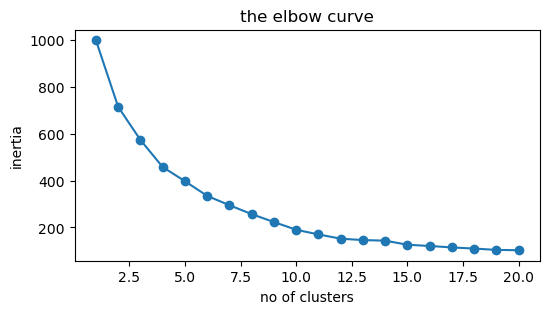

In [25]:
plt.figure(figsize=(6,3))
plt.plot(range(1,21),wcss,marker='o')
plt.title('the elbow curve')
plt.xlabel('no of clusters')
plt.ylabel('inertia')
plt.show()

In [27]:
#build a model with 6 clusters now (cuz elbow point=6)

kmeans=KMeans(n_clusters=6,init='k-means++')
kmeans.fit(dss)
pred=kmeans.predict(dss)

df=pd.DataFrame(dss)
df.head()

,0,1,2,3,4
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980


In [29]:
df['cluster']=pred
df.head()

,0,1,2,3,4,cluster
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801,0
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704,0
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913,0
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418,0
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980,0


In [30]:
df.tail()

,0,1,2,3,4,cluster
195,1.654129,-0.886405,-0.276302,2.268791,1.118061,5
196,1.671450,-0.886405,0.441365,2.497807,-0.861839,4
197,1.688771,1.128152,-0.491602,2.497807,0.923953,3
198,1.706091,1.128152,-0.491602,2.917671,-1.250054,4
199,1.723412,1.128152,-0.635135,2.917671,1.273347,3


In [31]:
df['cluster'].value_counts()

cluster
0    39
1    39
4    35
5    34
2    28
3    25
Name: count, dtype: int64